In [1]:
import numpy as np  
import pandas as pd  
from keras.utils import np_utils
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization
import time
import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
#存放資料的資料夾
dirdata1='0_img/'
dirdata2='1_img/'
dirdata3='2_img/'
dirdata4='3_img/'

In [3]:
#資料前處理，因原本的資料大小不固定，所以將其圖片進行填充
def data_img(dirdata1,dirdata2,dirdata3,dirdata4):
    data = [] # 1 step
    label = []
    height=120
    BLACK = [0,0,0]
    for i in os.listdir(dirdata1): # 2 step
        img = cv2.imread(dirdata1+i)
        x,y,z = img.shape
        if x<=height:
            constant = cv2.copyMakeBorder(img,0,height-x,0,0,cv2.BORDER_CONSTANT,value=BLACK)
        data.append(constant) # 2-2 
        label.append(0) # 2-3
    for i in os.listdir(dirdata2):
        img = cv2.imread(dirdata2+i)
        x,y,z = img.shape
        if x<=height:
            constant = cv2.copyMakeBorder(img,0,height-x,0,0,cv2.BORDER_CONSTANT,value=BLACK)
        data.append(constant) # 2-2 
        label.append(1) # 2-3
        
    for i in os.listdir(dirdata3):
        img = cv2.imread(dirdata3+i)
        x,y,z = img.shape
        if x<=height:
            constant = cv2.copyMakeBorder(img,0,height-x,0,0,cv2.BORDER_CONSTANT,value=BLACK)
        data.append(constant) # 2-2 
        label.append(2) # 2-3
        
    for i in os.listdir(dirdata4):
        img = cv2.imread(dirdata4+i)
        x,y,z = img.shape
        if x<=height:
            constant = cv2.copyMakeBorder(img,0,height-x,0,0,cv2.BORDER_CONSTANT,value=BLACK)
        data.append(constant) # 2-2 
        label.append(3) # 2-3
        
    data = np.array(data) # 3
    label = np.array(label) #3

    label_one_hot = np.eye(4)[label] # 4 one-hot encoding

    data_norm = data / 255 #5
    return data_norm,label_one_hot

In [4]:
#函式使用
data, label=data_img(dirdata1,dirdata2,dirdata3,dirdata4)

In [5]:
#將資料分為訓練與測試集
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, label, test_size=0.5, random_state=42)

In [6]:
#讀取VGG16套件
from keras.applications import vgg16

In [7]:
#讀取vgg16模型並重設輸入層
#其中並不包含原本的輸入與輸出
vgg16=vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(120,50,3))

In [8]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 50, 3)]      0         
                                                                 
 block1_conv1 (Conv2D)       (None, 120, 50, 64)       1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 120, 50, 64)       36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 60, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 60, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 60, 25, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 30, 12, 128)       0     

In [9]:
#建立新的模型
model = Sequential()

In [10]:
#將vgg16的訓練層讀進新模型
for layer in vgg16.layers:
    model.add(layer)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 120, 50, 64)       1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 120, 50, 64)       36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 60, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 60, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 60, 25, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 30, 12, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 30, 12, 256)       2

In [11]:
model.layers[0],model.layers[1],model.layers[2],model.layers[3]

(<keras.layers.convolutional.Conv2D at 0x19a70d47280>,
 <keras.layers.convolutional.Conv2D at 0x19a0de0b310>)

In [12]:
#將vgg16的訓練層參數全部凍結
#for layer in model.layers:
#    layer.trainable = False

In [14]:
#將vgg16的訓練層參數部分凍結
for i in range(1,13):
    model.layers[i].trainable = False

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 120, 50, 64)       1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 120, 50, 64)       36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 60, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 60, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 60, 25, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 30, 12, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 30, 12, 256)       2

In [16]:
#在新模型後加入新的輸出
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 120, 50, 64)       1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 120, 50, 64)       36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 60, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 60, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 60, 25, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 30, 12, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 30, 12, 256)       2

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

start_time = time.time()
# 開始訓練  
train_history = model.fit(X_train,Y_train,validation_split=0.2,epochs=100, batch_size=30, verbose=1)
end_time = time.time()

Epoch 1/100
4/4 [==============================] - 5s 443ms/step - loss: 1.5287 - accuracy: 0.3093 - val_loss: 1.2706 - val_accuracy: 0.5600
Epoch 2/100
4/4 [==============================] - 0s 34ms/step - loss: 1.2367 - accuracy: 0.4742 - val_loss: 1.1934 - val_accuracy: 0.7200
Epoch 3/100
4/4 [==============================] - 0s 34ms/step - loss: 1.2435 - accuracy: 0.4536 - val_loss: 1.1112 - val_accuracy: 0.5600
Epoch 4/100
4/4 [==============================] - 0s 34ms/step - loss: 1.0896 - accuracy: 0.5567 - val_loss: 0.9875 - val_accuracy: 0.7200
Epoch 5/100
4/4 [==============================] - 0s 34ms/step - loss: 1.0184 - accuracy: 0.6495 - val_loss: 1.1433 - val_accuracy: 0.6000
Epoch 6/100
4/4 [==============================] - 0s 34ms/step - loss: 0.8589 - accuracy: 0.7010 - val_loss: 1.2515 - val_accuracy: 0.5600
Epoch 7/100
4/4 [==============================] - 0s 34ms/step - loss: 0.9283 - accuracy: 0.6392 - val_loss: 0.6026 - val_accuracy: 0.8000
Epoch 8/100
4/4 [==

In [19]:
execution_time = (end_time - start_time)
print("執行時間: ",execution_time,"s")

執行時間:  18.789623737335205 s


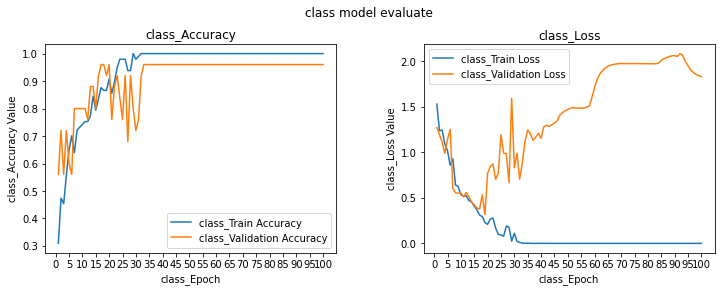

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('class model evaluate', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

class_epoch_list = list(range(1,101))
ax1.plot(class_epoch_list, train_history.history['accuracy'], label='class_Train Accuracy')
ax1.plot(class_epoch_list, train_history.history['val_accuracy'], label='class_Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 5))
ax1.set_ylabel('class_Accuracy Value')
ax1.set_xlabel('class_Epoch')
ax1.set_title('class_Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(class_epoch_list, train_history.history['loss'], label='class_Train Loss')
ax2.plot(class_epoch_list, train_history.history['val_loss'], label='class_Validation Loss')
ax2.set_xticks(np.arange(0, 101, 5))
ax2.set_ylabel('class_Loss Value')
ax2.set_xlabel('class_Epoch')
ax2.set_title('class_Loss')
l2 = ax2.legend(loc="best")

In [20]:
#model.save('2d_cnn_transfer_vgg16_4class-1.h5')

In [21]:
modello = keras.models.load_model('2d_cnn_transfer_vgg16_4class-1.h5')

In [21]:
time_pre=model.predict(X_test,verbose=2)

16/16 - 1s - 1s/epoch - 82ms/step


In [22]:
Y_test = np.argmax(Y_test,axis=1)
Y_pred = np.argmax(time_pre,axis=1)

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       247
           1       0.79      0.67      0.72        69
           2       0.88      0.94      0.91       127
           3       0.78      0.81      0.79        47

    accuracy                           0.88       490
   macro avg       0.84      0.83      0.84       490
weighted avg       0.88      0.88      0.88       490



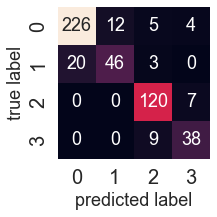

In [23]:
mat = confusion_matrix(Y_test,Y_pred)

sns.set(font_scale=1.5)
plt.subplot(1,2,1)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylabel('true label')
plt.xlabel('predicted label');

target_names = ["0","1","2","3"]
print(classification_report(Y_test,Y_pred,target_names=target_names))